Trinity Morisette

In [0]:
import matplotlib.pyplot as plt # helpful for plotting
import numpy as np 
import os, sys
from google.colab import files # google colab upload bar

In [2]:
uploaded = files.upload()  # upload your files as uploaded

Saving linear_data - linear_data.csv to linear_data - linear_data.csv


In [34]:
# load in the data 
data = np.loadtxt('linear_data - linear_data.csv', delimiter=',')
print(data.shape)

(1000, 3)


In [35]:
labels = data[:, -1] # take the labels from the data
print(labels.shape)

(1000,)


In [0]:
data = data[:, 0:3] # take off the labels from data for training

In [37]:
print(data.shape)

(1000, 3)


In [0]:
positive_x = data[labels == 1, 0]  # get the x coordinates of all data examples with label 1
positive_y = data[labels == 1, 1] # get the y coordinates of all data examples with label 1

In [0]:
negative_x = data[labels == 0, 0]  # get the rows of column 1 where the label equals 0
negative_y = data[labels == 0, 1] #get the rows of column 2 where the label equals 0

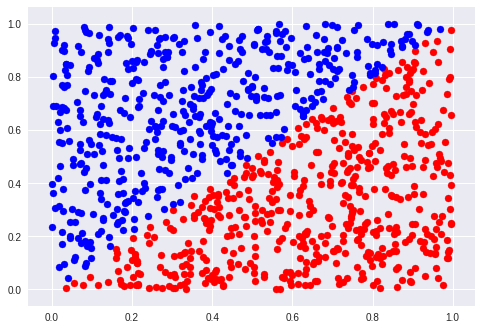

In [40]:
plt.scatter(positive_x, positive_y, c='r') # plot the positive samples given x and y values
plt.scatter(negative_x, negative_y, c='b')  # plot the negative samples given the x and y coordinates 
plt.show()

In [41]:
print(data.shape)

(1000, 3)


In [0]:
weights = np.random.randn(3, ) * 0.01 # make small random weights

In [43]:
print(weights)

[-1.00208824e-02  2.51643567e-04  9.76138905e-05]


In [0]:
lr = 0.05 # learning rate --- usually between 1e-5 and .1

In [0]:
errors = []  # make an empty list for the errors

In [0]:
# have i count up to the number of samples in the dataset, 
# and each time, do what the indented lines below say
for i in range(data.shape[0]):
  
  # forward pass
  x = data[i, :]  # take out the ith sample
  y = labels[i]  # take out the label for the ith sample
  out = np.dot(x, weights)  # get the weighted sum for this example
  out = np.round(out)  # round the output to 1 if its greater than .5 or 0 otherwise
  
  # backward pass 
  error = y - out # difference between network's output and actual label
  errors.append(error) # add new error to end of errors 
  
  weights += lr * (error * x)  # update the weights

In [47]:
print(weights)

[0.29376388 0.15924501 0.50009761]


In [0]:
# send the whole dataset through the perceptron
all_out = np.round(np.matmul(data, weights))

In [49]:
correct = (all_out == labels) # compare outputs to labels elementwise
print(np.mean(correct))  # print the accuracy on the training set

1.0


In [0]:
# get all of the data samples where the perceptron pridicted 0
pred_neg = data[all_out == 0, :]

# get all of the data samples where the perceptron predicted 1
pred_pos = data[all_out == 1, :]

In [0]:
# calculate the difference between each label and its respective ouptut
diff = labels - all_out

# take the samples out of data where the difference is not 0 (the ones it got wrong.)
wrong_pred = data[diff != 0, :]

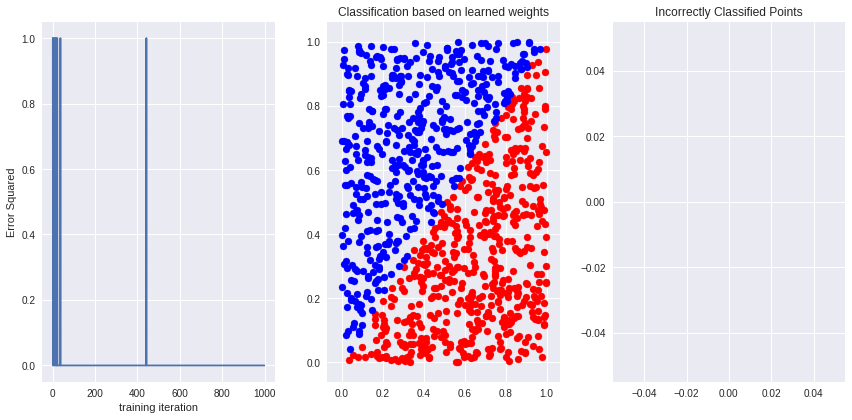

In [52]:
# create a figure
fig = plt.figure(figsize=(12, 6))

# create three subplots within the figure in a row
subplot1 = fig.add_subplot(131)
subplot2 = fig.add_subplot(132)
subplot3 = fig.add_subplot(133)

# set the xlabels and ylabels for subplot 1
subplot1.set_xlabel('training iteration')
subplot1.set_ylabel('Error Squared')

# tell subplot 1 what it's supposed to show
subplot1.plot(errors)

# set just a title for subplot 2
subplot2.set_title('Classification based on learned weights')

# tell subplot 2 to make a scatter plot where the ones predicted to be
# 1 by the perceptron are colored red and their x and y locations
subplot2.scatter(pred_pos[:, 0], pred_pos[:, 1], c='r')

# tell subplot 2 to also make the negative predictions blue and plot them
# according to their x and y values
subplot2.scatter(pred_neg[:, 0], pred_neg[:, 1], c='b')

# make a title for the third subplot
subplot3.set_title('Incorrectly Classified Points')

# make a scatter plot using the ones it got wrong
subplot3.scatter(wrong_pred[:, 0], wrong_pred[:, 1], c='g')

# use this when there are a lot of subplots/words...sometimes doesn't show right otherwise
plt.tight_layout()
plt.show() # show the plot

The results without the bias were very different from the results with the bias unit. Within a neural network the number of activities and weights should be equal to allow the formation of a weighted sum. To balance out the number of weights and activities, one must create another input term to add a constant term with it. By adding a bias unit, you are placing an extra value of 1 at each layer. You can do this because any value multiplied by one is that value. 